Advanced Customization 

In [1]:
#Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#Loading Data 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter for Data Analyst Roles

df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

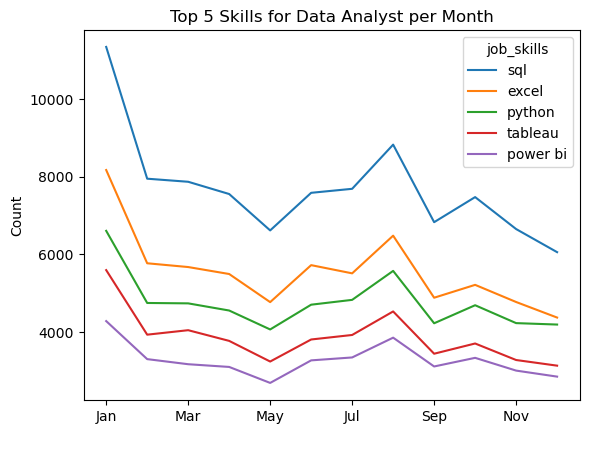

In [ ]:
#creating a new column for job_posted_month
df_da['job_posted_month'] = df_da['job_posted_date'].dt.month 

#explode job_skills column and create a pivot df
df_da_explode = df_da.explode('job_skills')
df_da_pivot = df_da_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

#sort the skills by count
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot = df_da_pivot.drop('Total')

#Use month names for plotting 
df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['month'] = df_da_pivot['job_posted_month'].apply(lambda x:pd.to_datetime(x,format='%m').strftime('%b'))
df_da_pivot = df_da_pivot.set_index('month')
df_da_pivot = df_da_pivot.drop(columns= 'job_posted_month')

#Get the top 5 skills and plot
df_da_pivot.iloc[:, :5].plot(kind='line')

#cleaning plot
plt.title('Top 5 Skills for Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel(' ')
plt.show()



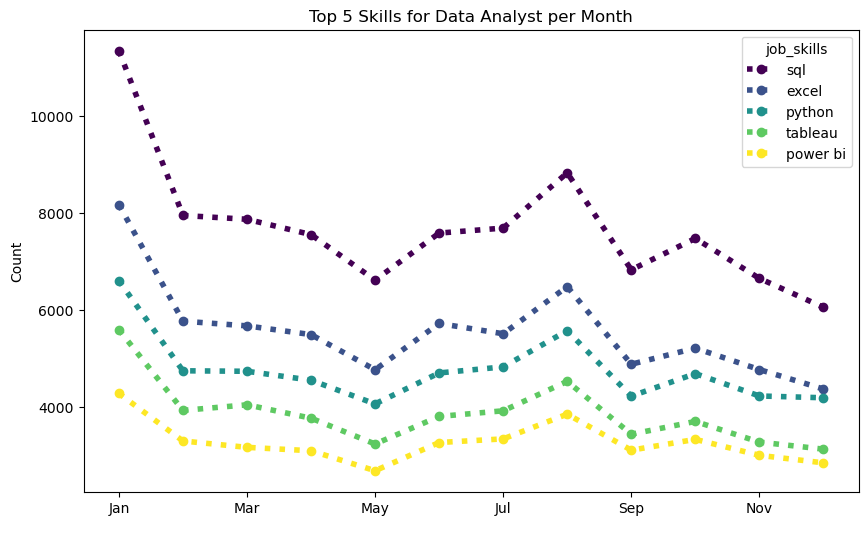

In [ ]:
#This code block will show advanced custpomization options 
df_da_pivot.iloc[:, :5].plot(
    kind='line', #specifies type of plot
    linewidth=4, #changes width 
    linestyle=':',# changes line style [#options : '-', '--', '-.', ':']
    colormap='viridis', #changes color map [options on cheatsheet]
    marker = 'o', #changes marker for each data point
    figsize=(10,6) #changes the size of the figure
    )

#adding labels to the plot 
plt.title('Top 5 Skills for Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel(' ')
plt.show()


In [ ]:
#Now we are going to customize a scatter plot

#explode job_skills into individual rows
df_exploded = df_da.explode('job_skills')

#calculate the average salary and count of job postings per skill 
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg','median'),
    skill_count=('job_skills','count')
)

#limit the top skills 
skill_count = 20 
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats


,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


In [ ]:
#importing needed function from library adjustText\

from adjustText import adjust_text

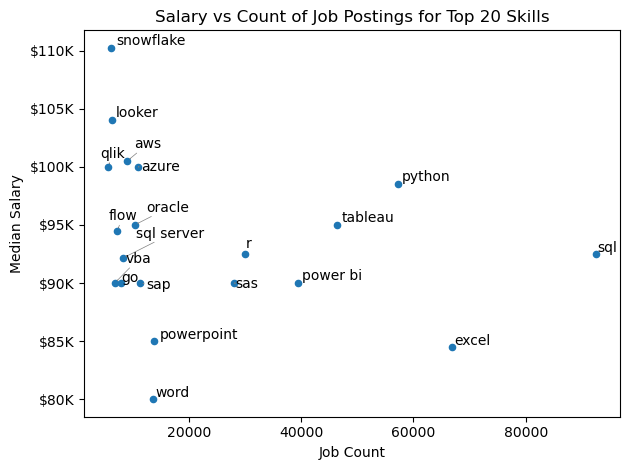

In [ ]:

skill_stats.plot(
    kind='scatter',
    x='skill_count',
    y='median_salary'
)

#creating empty list for adjust text method
texts = []

for i,txt in enumerate(skill_stats.index):
    texts.append(
        plt.text(
        x=skill_stats['skill_count'].iloc[i], #x coordinate for where text goes
        y=skill_stats['median_salary'].iloc[i], #y coordinate for where text goes
        s=txt #what text goes in the coordinates
        ))
    
#using adjust text method to add arrows to the text to point to the correct point
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

#getting current axis 
ax = plt.gca()
#this code adjusts the y axis so you can format it however you want 
#in this code I use a lambda function to change the values to a different format
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

#adjusting titles, labels and legends
plt.title(f'Salary vs Count of Job Postings for Top {skill_count} Skills')
plt.ylabel('Median Salary')
plt.xlabel('Job Count')

#adjusting layouit and display of the plot 
plt.tight_layout()
plt.show()